# Evaluating Logistic Regression Models - Lab

## Introduction

 In regression, you are predicting values so it made sense to discuss error as a distance of how far off our estimates were. In classifying a binary variable however, a model is either correct or incorrect. As a result, we tend to deconstruct this as how many false positives versus false negatives we come across.  
In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this review lab, we'll review precision, recall, accuracy, and F1-score in order to evaluate our logistic regression models.


## Objectives
You will be able to:  
* Understand and assess precision, recall, and accuracy of classifiers
* Evaluate classification models using various metrics

## Terminology Review  

Let's take a moment and review some classification evaluation metrics:  


$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

$\text{F1-Score} = 2\ \frac{Precision\ x\ Recall}{Precision + Recall}$


At times, it may be superior to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is much preferable to optimize for recall, the number of cancer positive cases, then it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
X = df[df.columns[:-1]]
y = df.target

#Normalize the Data
for col in df.columns:
    df[col] = (df[col]-min(df[col]))/ (max(df[col]) - min(df[col]))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 2. Create a standard logistic regression model

In [4]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [5]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

## 3. Write a function to calculate the precision

In [6]:
def precision(y_hat, y):
    tp = 0
    for i, label in enumerate(y):
        if label == 1:
            if label == y_hat[i]:
                tp += 1
    return tp / sum(y_hat)

## 4. Write a function to calculate the recall

In [7]:
def recall(y_hat, y):
    tp = 0
    for i, label in enumerate(y):
        if label == 1:
            if label == y_hat[i]:
                tp += 1
    return tp / sum(y)

## 5. Write a function to calculate the accuracy

In [8]:
def accuracy(y_hat, y):
    tp = 0
    tn = 0
    n = len(y)
    for i, label in enumerate(y):
        if label == 1:
            if label == y_hat[i]:
                tp += 1
        elif label != 1:
            if label == y_hat[i]:
                tn +=1
    return (tp + tn) / n

## 6. Write a function to calculate the F1-score

In [9]:
def f1_score(y_hat,y):
    return 2 * precision(y_hat, y) * recall(y_hat, y) / (precision(y_hat, y) + recall(y_hat, y))

## 7. Calculate the precision, recall, accuracy, and F1-score of your classifier.

Do this for both the training and the test set

In [10]:
print(f"Train Precision: {precision(y_hat_train,y_train)}")
print(f"Train Recall: {recall(y_hat_train,y_train)}")
print(f"Train Accuracy: {accuracy(y_hat_train,y_train)}")
print(f"Train F1-Score: {f1_score(y_hat_train,y_train)}")
print(f"\nTest Precision: {precision(y_hat_test,y_test)}")
print(f"Test Recall: {recall(y_hat_test,y_test)}")
print(f"Test Accuracy: {accuracy(y_hat_test,y_test)}")
print(f"Test F1-Score: {f1_score(y_hat_test,y_test)}")

Train Precision: 0.8396946564885496
Train Recall: 0.9016393442622951
Train Accuracy: 0.8546255506607929
Train F1-Score: 0.8695652173913043

Test Precision: 0.8125
Test Recall: 0.9069767441860465
Test Accuracy: 0.8289473684210527
Test F1-Score: 0.8571428571428572


Great Job! Now it's time to check your work with sklearn. 

## 8. Calculating Metrics with sklearn

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions with the sklearn functions above. Calculate these values for both your train and test set.

In [11]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [12]:
print('Sci-ket Learn metrics')
print(f"Train Precision: {precision_score(y_train,y_hat_train)}")
print(f"Train Recall: {recall_score(y_train,y_hat_train)}")
print(f"Train Accuracy: {accuracy_score(y_train,y_hat_train)}")
print(f"Train F1-Score: {f1_score(y_train,y_hat_train)}")
print(f"\nTest Precision: {precision_score(y_test,y_hat_test)}")
print(f"Test Recall: {recall_score(y_test,y_hat_test)}")
print(f"Test Accuracy: {accuracy_score(y_test,y_hat_test)}")
print(f"Test F1-Score: {f1_score(y_test,y_hat_test)}")

Sci-ket Learn metrics
Train Precision: 0.8396946564885496
Train Recall: 0.9016393442622951
Train Accuracy: 0.8546255506607929
Train F1-Score: 0.8695652173913043

Test Precision: 0.8125
Test Recall: 0.9069767441860465
Test Accuracy: 0.8289473684210527
Test F1-Score: 0.8571428571428572


## 9. Comparing Precision, Recall, Accuracy, and F1-Score of Test vs Train Sets


Calculate and then plot the precision, recall, accuracy, and F1-score for the test and train splits using different train set sizes. What do you notice?

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []
training_F1 = []
testing_F1 = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i/100)
    logreg = LogisticRegression(fit_intercept = False, C = 1e12)
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)
    training_Precision.append(precision(y_hat_train, y_train))
    testing_Precision.append(precision(y_hat_test, y_test))
    training_Recall.append(recall(y_hat_train, y_train))
    testing_Recall.append(recall(y_hat_test, y_test))
    training_Accuracy.append(accuracy(y_hat_train, y_train))
    testing_Accuracy.append(accuracy(y_hat_test, y_test))
    training_F1.append(f1_score(y_hat_train,y_train))
    testing_F1.append(f1_score(y_hat_test,y_test))

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logisti

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logisti

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.

Create 4 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, testing and training accuracy in the third one, and testing and training f1-score in the fourth one.

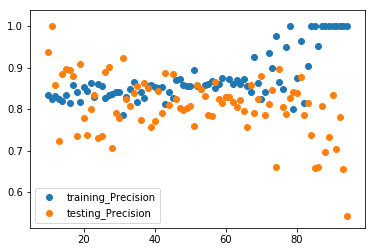

In [18]:
# code for test and train precision
plt.scatter(list(range(10,95)), training_Precision, label = 'training_Precision')
plt.scatter(list(range(10,95)), testing_Precision, label = 'testing_Precision')
plt.legend();

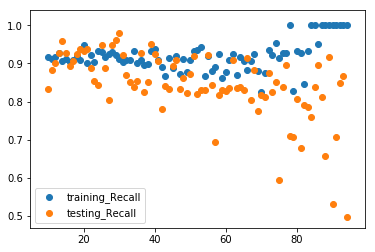

In [19]:
# code for test and train recall
plt.scatter(list(range(10,95)), training_Recall, label = 'training_Recall')
plt.scatter(list(range(10,95)), testing_Recall, label = 'testing_Recall')
plt.legend();

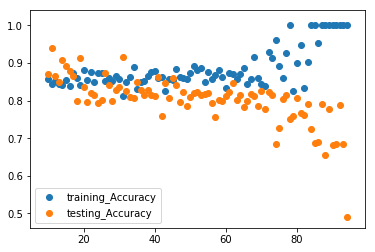

In [20]:
# code for test and train accuracy
plt.scatter(list(range(10,95)), training_Accuracy, label = 'training_Accuracy')
plt.scatter(list(range(10,95)), testing_Accuracy, label = 'testing_Accuracy')
plt.legend();

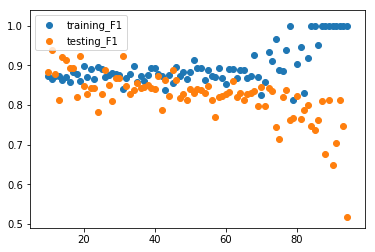

In [21]:
# code for test and train F1-score
plt.scatter(list(range(10,95)), training_F1, label = 'training_F1')
plt.scatter(list(range(10,95)), testing_F1, label = 'testing_F1')
plt.legend();

## Summary

Nice! In this lab, you gained some extra practice with evaluation metrics for classification algorithms. You also got some further python practice by manually coding these functions yourself, giving you a deeper understanding of how they work. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.